In [452]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.datasets import make_blobs 
import imageio
import os

  1%|          | 6/500 [00:00<00:33, 14.79it/s]


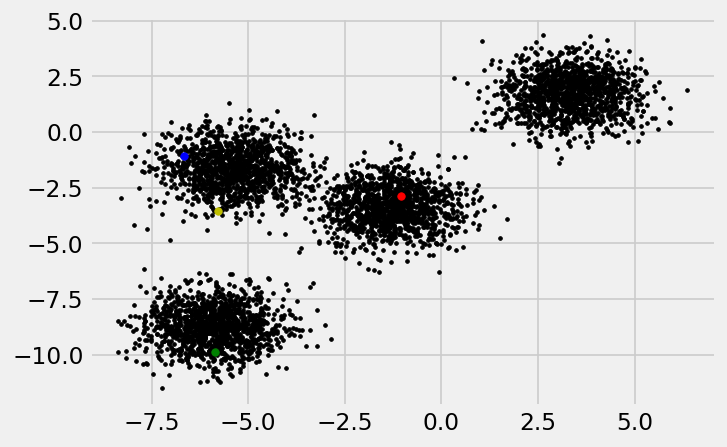

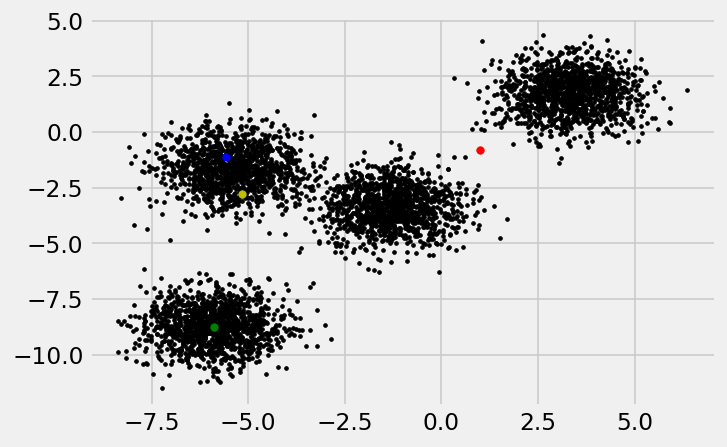

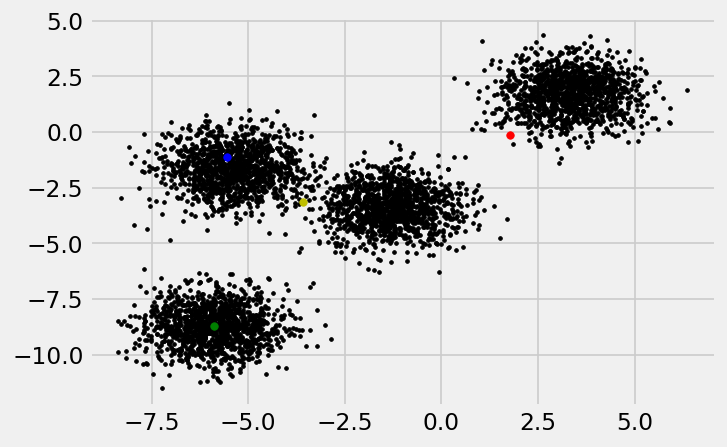

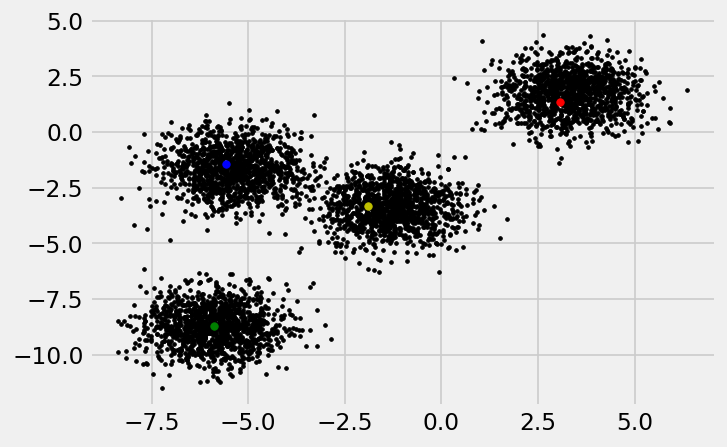

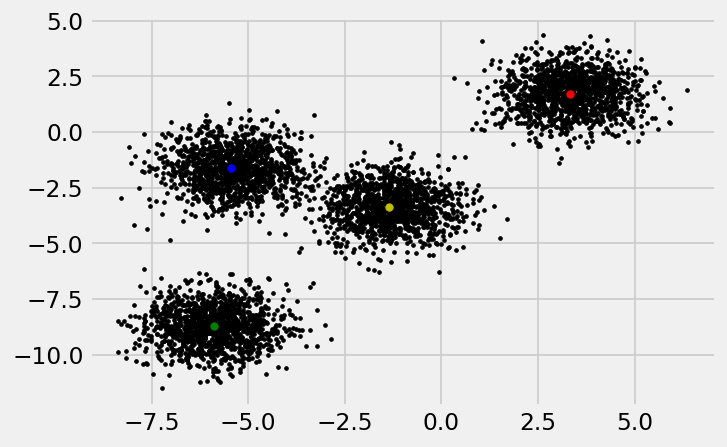

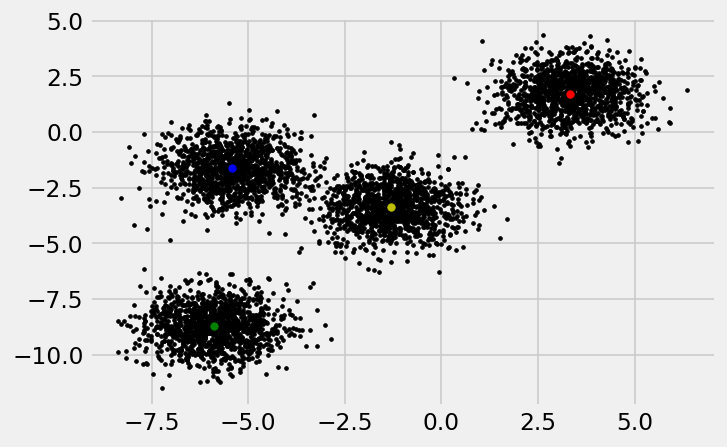

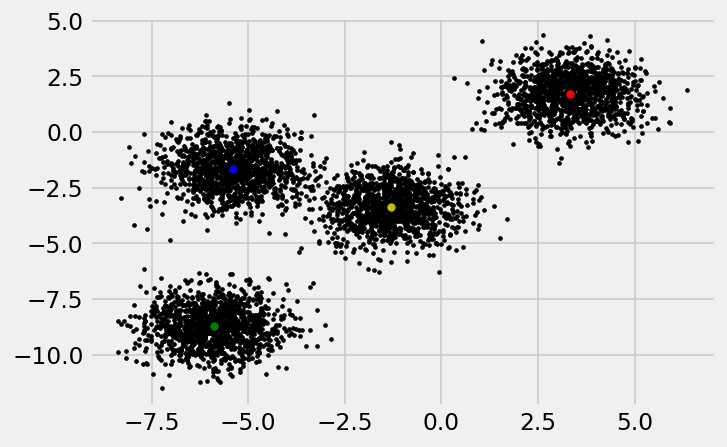

In [451]:
class Kmeans:
    def __init__(self, X, n_clasters, iterations = 500):
        self.X = X
        self.iterations = iterations
        self.k = n_clasters
        self.centroids = self.X[np.random.randint(0,self.X.shape[0],self.k)]
        
        self.history_centroids = []
        self.history_clusters = []
        
        self.colors = ['r', 'y', 'b', 'g']
        self.last = 0
        
    def save_plot(self, centroids, iteration):
        plt.figure(dpi = 120)
        #plt.rcParams['axes.facecolor'] = 'tab:cyan'
        plt.style.use('fivethirtyeight')
        plt.scatter(self.X[:,0],self.X[:,1], s = 5, c = 'k')
        for i in range(self.k):
            plt.scatter(centroids[i,0], centroids[i,1], s = 20, c = self.colors[i])
            
        plt.savefig('{}.png'.format(iteration))
        
    def gif(self):
        files = ['{}.png'.format(i) for i in range(self.last)]
        with imageio.get_writer('mygif.gif', mode='I') as writer:
            for filename in files:
                image = imageio.imread(filename)
                writer.append_data(image)
                
        for filename in files:
            os.remove(filename)

        
    def fit(self):
        old_centroids = self.centroids
        for iteration in tqdm(range(self.iterations)): 
            distances = np.array([np.power(np.sum((self.X - old_centroids[i])**2,axis = 1),.5) for i in range(self.k)])
            clusters_idx = np.argmin(distances,axis = 0)
            clusters = [self.X[np.where(clusters_idx == i)] for i in range(self.k)]
            new_centroids = np.array([np.mean(clusters[i], axis = 0) for i in range(self.k)])
            
            self.save_plot(old_centroids,iteration)
            
                
                
            if np.sum((new_centroids-old_centroids)**2) == 0:
                self.last = iteration
                break
            
            old_centroids = new_centroids
            
            
            
            
x, y = make_blobs(n_samples=5000, centers=4, cluster_std=0.9)
kmeans = Kmeans(x,4)
kmeans.fit()
kmeans.gif()